## Section B: Prediction Uncertainty with Bootstrapping
This section is the adaptation of Activity 2 from KNN classification to KNN regression. You use the bootstrapping technique to quantify the uncertainty of predictions for the KNN regressor that you implemented in Section A.


### Question 3 : Bootstrapping
> ##### 1. Loading Datasets

In [15]:
# load libraries:
library(reshape2)
library(ggplot2)

# Load data:
train_data <- read.csv("Task1B_train.csv", header = TRUE, sep = ',')
test_data <- read.csv("Task1B_test.csv", header = TRUE, sep = ',')
train.len=nrow(test_data)
# create training and testing datasets:
train.data <- train_data[, -5]
train.label <- train_data[, 5]
test.data <- test_data[, -5]
test.label <- test_data[, 5]

> ##### 2. Bootstrapping for KNN Regression

In [16]:
# define a function that generates sample indixes based on bootstrap technique
boot <- function (original.size=100, sample.size=original.size, times=100){
    indx <- matrix(nrow=times, ncol=sample.size)
    for (t in 1:times){
        indx[t, ] <- sample(x=original.size, size=sample.size, replace = TRUE)
    }
    return(indx)
}


In [17]:
# KNN function (distance should be one of euclidean, maximum, manhattan, canberra, binary or minkowski)
knn <- function(train.data, train.label, test.data, K=3, distance = 'euclidean'){
    train.len <- nrow(train.data)
    test.len <- nrow(test.data)
    dist <- as.matrix(dist(rbind(test.data, train.data), method= distance))[1:test.len, (test.len+1):(test.len+train.len)]
    for (i in 1:test.len){
        nn <- as.data.frame(sort(dist[i,], index.return = TRUE))[1:K,2]
        test.label[i]<- (mean(train.label[nn]))
    }
    return (test.label)
}

In [18]:
# fix the parameters (50,40,50)
K <- 20          # Maximum K for KNN 
L <- 100           # number of datasets
N <- 25         # size of datasets

# generate bootstrap indices:
boot.indx <- boot(nrow(train.data), N, L)

# a dataframe to track the number of missclassified samples in each case
miss <- data.frame('K'=1:K, 'L'=1:L, 'test'=rep(0,L*K))

# THIS MAY TAKE A FEW MINUTES TO COMPLETE
## for every k values:
for (k in 1: K){
    
    ### for every dataset sizes:
    for (l in 1:L){
        
        #### calculate iteration index i
        i <- (k-1)*L+l
        #### save sample indices that were selected by bootstrap
        indx <- boot.indx[l,]
        
        #### save the value of k and l
        miss[i,'K'] <- k
        miss[i,'L'] <- l
        
        #### calculate and record the train and test missclassification rates
        miss[i,'test'] <-  sqrt(mean((knn(train.data[indx, ], train.label[indx], test.data, K=k)  - test.label)^2))
    } 
}

### Visalization
Let see the output. In the following Jitter Plot, each point corrspends to the error (measured on the fixed test set) of the KNN classifier trained by a random training sample generated during our bootstrap sampling. 

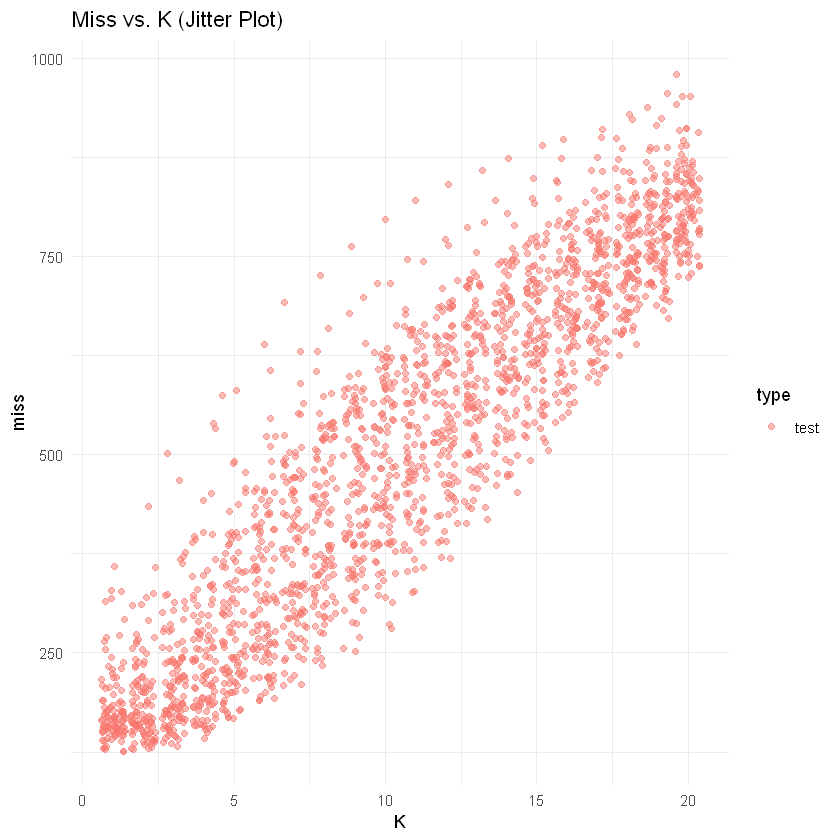

In [19]:
# plot misclassification percentage for train and test data sets
miss.m <- melt(miss, id=c('K', 'L')) # reshape for visualization
names(miss.m) <- c('K', 'L', 'type', 'miss')
ggplot(data=miss.m, aes(x=K, miss, color=type)) + geom_jitter(alpha=0.5)  + 
    scale_fill_discrete(guide = guide_legend(title = NULL)) + 
    ggtitle('Miss vs. K (Jitter Plot)') + theme_minimal() 

Now we produce the box plot of the error numbers (each of which corresponding to a sample in our bootstrap sampling) we have obtained for our test set for each value of K. 

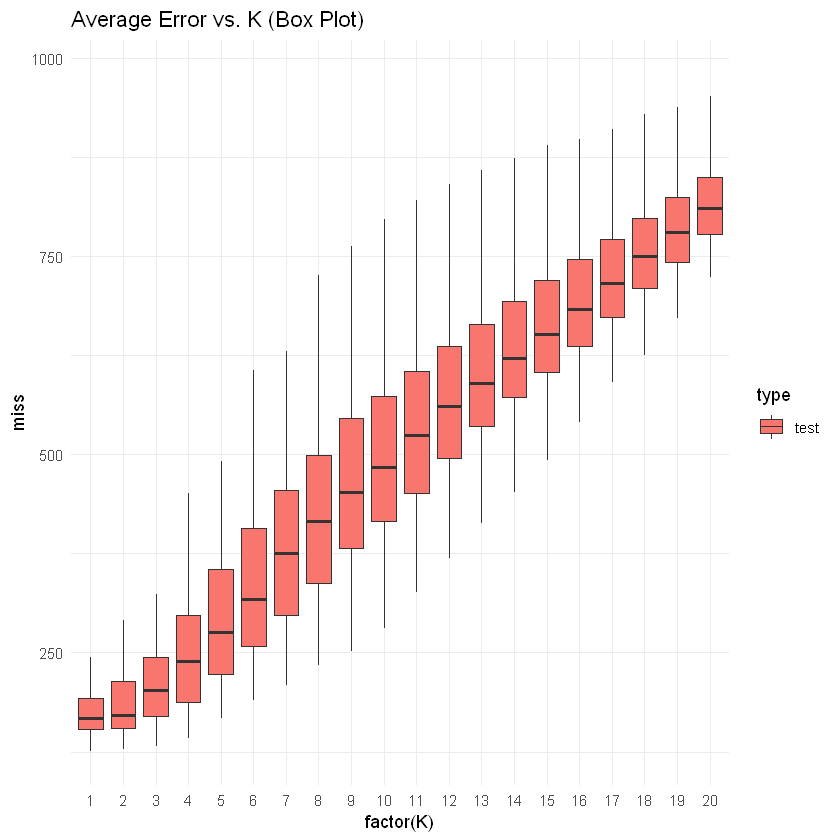

In [20]:
ggplot(data=miss.m[miss.m$type=='test',], aes(factor(K), miss,fill=type)) + geom_boxplot(outlier.shape = NA)  + 
    scale_color_discrete(guide = guide_legend(title = NULL)) + 
    ggtitle('Average Error vs. K (Box Plot)') + theme_minimal()
# ignore the warnings (because of ignoring outliers)
options(warn=-1)

> ##### 3. How does the test errorand its uncertainty behave as K increases?
> * As the K increases, we can see that, the mean error increases gradually.
> * We can notice that as we increase the K, the uncertainty of the prediction increases in the mid, ranging from K = 5 to 17, and later as we keep on increasing the K, the uncertainty again decreases.
> * The optimum value for K would be 1, since the mean error and the uncertainty is lowest.

The increase in uncertainty can be explained in terms of model complexity. Greater values of K imply a more generalized model which leads to underfitting. As such, the model with a high bias and high variance.


> ##### 4. Bootstrapping for KNN Regressor with fixed K =10, N=25 and changing L

In [34]:
# fix the parameters (50,40,50)
K <- 10        # Maximum K for KNN            # number of datasets
N <- 25         # size of datasets

# generate bootstrap indices:

# a dataframe to track the number of missclassified samples in each case
miss <- data.frame(i=0,k=20, l=20, test=0)
i<-1

In [35]:
for (L in seq(10,200,10) ){
    boot.indx <- boot(nrow(train.data), N, L)
    for (l in 1:L){
        #### calculate iteration index i
        #### save sample indices that were selected by bootstrap
        indx <- boot.indx[l,]
        test <-  sqrt(mean((knn(train.data[indx, ], train.label[indx], test.data, K=K)  - test.label)^2))
        #### save the value of k and l
        miss[i,]<-c(i,K,L,test)
        i=i+1
        
        #### calculate and record the train and test missclassification rates
        
    } 
}

In [41]:
#renaming the column names of the miss dataframe 
names(miss)<-c('Index','K','L','Error')
miss['Test']<-"Test"

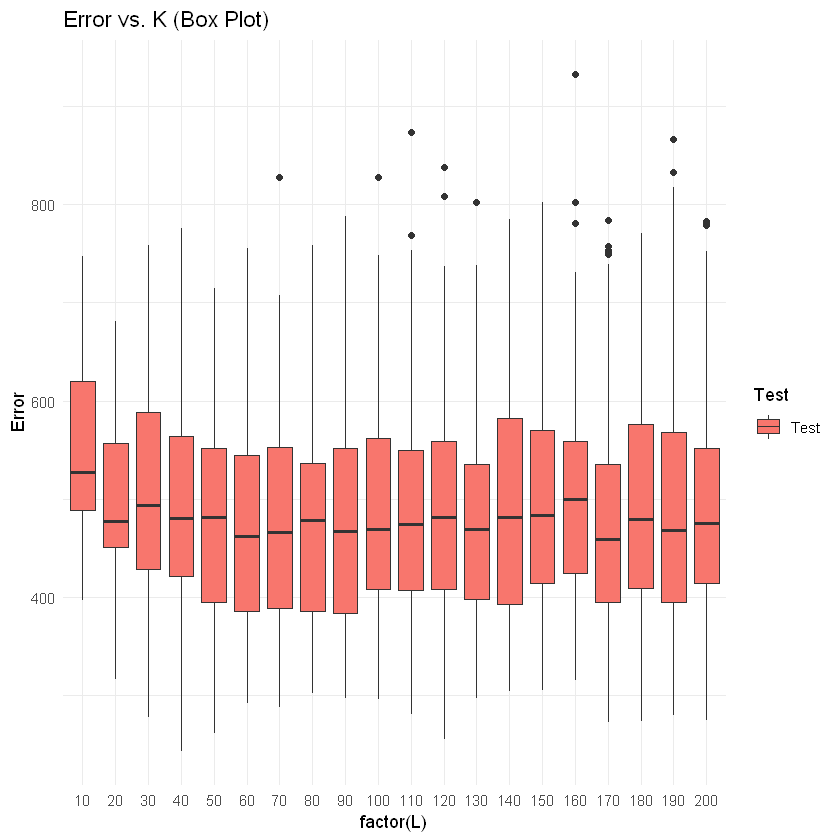

In [42]:
ggplot(data=miss, aes(factor(L), Error,fill=Test),color = factor(L)) + geom_boxplot() +
    ggtitle('Error vs. K (Box Plot)') + theme_minimal()
# ignore the warnings (because of ignoring outliers)
options(warn=-1)

> ##### 5. From above,
> Increasing the number of subsets in bootstrapping, does not have a significant effect on the mean error or the uncertainty around it.
> This can be explained by the size of each bootstrapped sample: we are only using 25 data points in each sample for training models. As chosen subsets are very small compared to population size, it gets difficult to capture the properties of true model.